In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
distributed_solar_df=pd.read_csv('/home/student/Documents/Data Set/Statewide_Distributed_Solar_Projects__Beginning_2000.csv')

/tmp/ipykernel_51481/825374068.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  distributed_solar_df=pd.read_csv('/home/student/Documents/Data Set/Statewide_Distributed_Solar_Projects__Beginning_2000.csv')


In [3]:
distributed_solar_df.head(50)

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,04/30/2024,SDG-70312,04/30/2024,Con Ed,Brooklyn,Kings,11233.0,CENY-BK,Brownsville_1,5B30,Brooklyn SolarWorks,NM,6.79,5.80,7966,NaN,1
1,04/30/2024,SDG-70306,04/29/2024,Con Ed,Cortlandt Manor,Westchester,10567.0,CENY-W,Buchanan,89U1,Trinity Solar,NM,7.02,6.00,8240,NaN,1
2,04/30/2024,SDG-70287,04/30/2024,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9614,Kamtech Solar Solutions,NM,3.69,3.15,4326,NaN,1
3,04/30/2024,SDG-70285,04/30/2024,Con Ed,Brooklyn,Kings,11230.0,CENY-BK,Bensonhurst_1,7B47,Kamtech Solar Solutions,NM,12.73,10.88,14943,NaN,1
4,04/30/2024,SDG-70281,04/30/2024,Con Ed,Bronx,Bronx,10456.0,CENY-BX,Mott_Haven,4X50,Kamtech Solar Solutions,NM,3.88,3.32,4560,NaN,1
5,04/30/2024,SDG-70276,04/25/2024,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9532,Kamtech Solar Solutions,NM,4.42,3.78,5191,NaN,1
6,04/30/2024,SDG-70271,04/30/2024,Con Ed,S Richmond Hill,Queens,11419.0,CENY-Q,Brownsville_2,9B15,Kamtech Solar Solutions,NM,6.90,5.90,8103,NaN,1
7,04/30/2024,SDG-70258,04/30/2024,Con Ed,Brooklyn,Kings,11203.0,CENY-BK,Bensonhurst_2,4B05,Eliyahu,NM,5.27,4.50,6180,NaN,1
8,04/30/2024,SDG-70254,04/30/2024,Con Ed,Hollis,Queens,11423.0,CENY-Q,Jamaica,SD2703,Solarblocks Energy llc,NM,7.46,6.38,8762,NaN,1
9,04/30/2024,SDG-70207,04/25/2024,Con Ed,Cambria Heights,Queens,11411.0,CENY-Q,Jamaica,9335,Kamtech Solar Solutions,NM,9.50,8.12,11152,NaN,1


In [4]:
distributed_solar_df.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                94
Division                                        87972
Substation                                      82655
Circuit ID                                          7
Developer                                       10360
Metering Method                                   465
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              221951
Number of Projects                                  0
dtype: int64

In [5]:
distributed_solar_df['Division'] = distributed_solar_df.groupby(['Zip', 'City/Town'])['Division'].transform(lambda x: x.ffill().bfill())


In [6]:
distributed_solar_df['Division'].isnull().value_counts()

Division
False    139353
True      87069
Name: count, dtype: int64

In [7]:
remaining_null_values = distributed_solar_df['Division'].isnull().sum()

In [8]:
print("Remaining null values in 'Division':", remaining_null_values)

Remaining null values in 'Division': 87069


In [10]:
if remaining_null_values > 0:
    mean_value = remaining_null_values.mean()

In [11]:
distributed_solar_df['Division'] = distributed_solar_df['Division'].fillna(mean_value)

In [12]:
print("Missing values in 'Division' after final filling:", distributed_solar_df['Division'].isnull().sum())

Missing values in 'Division' after final filling: 0


In [20]:
distributed_solar_df['Substation'] = distributed_solar_df.groupby(['Zip', 'City/Town'])['Substation'].transform(lambda x: x.ffill().bfill())


In [21]:
distributed_solar_df['Substation'].isnull().value_counts()

Substation
False    211401
True      15021
Name: count, dtype: int64

In [22]:
remaining_substation_null_values = distributed_solar_df['Substation'].isnull().sum()

In [23]:
print("Remaining null values in 'Substation':", remaining_substation_null_values)

Remaining null values in 'Substation': 15021


In [24]:
if remaining_substation_null_values > 0:
    mean_value = remaining_substation_null_values.mean()

In [25]:
distributed_solar_df['Substation'] = distributed_solar_df['Substation'].fillna(mean_value)

In [26]:
print("Missing values in 'Substation' after final filling:", distributed_solar_df['Substation'].isnull().sum())

Missing values in 'Substation' after final filling: 0


In [27]:
distributed_solar_df['Developer'] = distributed_solar_df.groupby(['Division', 'Substation'])['Developer'].transform(lambda x: x.ffill().bfill())


In [28]:
distributed_solar_df['Developer'].isnull().value_counts()

Developer
False    226370
True         52
Name: count, dtype: int64

In [29]:
remaining_developer_null_values = distributed_solar_df['Developer'].isnull().sum()

In [30]:
print("Remaining null values in 'Developer':", remaining_developer_null_values)

Remaining null values in 'Developer': 52


In [31]:
if remaining_developer_null_values > 0:
    mean_value = remaining_developer_null_values.mean()

In [32]:
distributed_solar_df['Developer'] = distributed_solar_df['Developer'].fillna(mean_value)

In [33]:
print("Missing values in 'Developer' after final filling:", distributed_solar_df['Developer'].isnull().sum())

Missing values in 'Developer' after final filling: 0


In [34]:
distributed_solar_df['Energy Storage System Size (kWac)'] = distributed_solar_df.groupby(['Developer', 'Estimated Annual PV Energy Production (kWh)'])['Energy Storage System Size (kWac)'].transform(lambda x: x.ffill().bfill())


In [36]:
distributed_solar_df['Energy Storage System Size (kWac)'].isnull().value_counts()

Energy Storage System Size (kWac)
True     178041
False     48381
Name: count, dtype: int64

In [38]:
remaining_kWac_null_values = distributed_solar_df['Energy Storage System Size (kWac)'].isnull().sum()

In [39]:
print("Remaining null values in 'Energy Storage System Size (kWac)':", remaining_kWac_null_values)

Remaining null values in 'Energy Storage System Size (kWac)': 178041


In [40]:
if remaining_kWac_null_values > 0:
    mean_value = remaining_kWac_null_values.mean()

In [41]:
distributed_solar_df['Energy Storage System Size (kWac)'] = distributed_solar_df['Energy Storage System Size (kWac)'].fillna(mean_value)

In [42]:
print("Missing values in 'Energy Storage System Size (kWac)' after final filling:", distributed_solar_df['Energy Storage System Size (kWac)'].isnull().sum())

Missing values in 'Energy Storage System Size (kWac)' after final filling: 0


In [43]:
distributed_solar_df['Metering Method'] = distributed_solar_df.groupby(['Circuit ID', 'Estimated PV System Size (kWdc)'])['Metering Method'].transform(lambda x: x.ffill().bfill())


In [44]:
distributed_solar_df['Metering Method'].isnull().value_counts()

Metering Method
False    226207
True        215
Name: count, dtype: int64

In [45]:
remaining_metering_null_values = distributed_solar_df['Metering Method'].isnull().sum()

In [46]:
print("Remaining null values in 'Metering Method':", remaining_metering_null_values)

Remaining null values in 'Metering Method': 215


In [47]:
if remaining_kWac_null_values > 0:
    mean_value = remaining_metering_null_values.mean()

In [48]:
distributed_solar_df['Metering Method'] = distributed_solar_df['Metering Method'].fillna(mean_value)

In [49]:
print("Missing values in 'Metering Method' after final filling:", distributed_solar_df['Metering Method'].isnull().sum())

Missing values in 'Metering Method' after final filling: 0


In [50]:
distributed_solar_df['Circuit ID'] = distributed_solar_df.groupby(['Developer', 'Metering Method'])['Circuit ID'].transform(lambda x: x.ffill().bfill())


In [51]:
distributed_solar_df['Circuit ID'].isnull().value_counts()

Circuit ID
False    226418
True          4
Name: count, dtype: int64

In [52]:
remaining_circuit_null_values = distributed_solar_df['Circuit ID'].isnull().sum()

In [53]:
print("Remaining null values in 'Circuit ID':", remaining_circuit_null_values)

Remaining null values in 'Circuit ID': 4


In [54]:
if remaining_circuit_null_values > 0:
    mean_value = remaining_circuit_null_values.mean()

In [55]:
distributed_solar_df['Circuit ID'] = distributed_solar_df['Circuit ID'].fillna(mean_value)

In [56]:
print("Missing values in 'Circuit ID' after final filling:", distributed_solar_df['Circuit ID'].isnull().sum())

Missing values in 'Circuit ID' after final filling: 0


In [57]:
distributed_solar_df['Zip'] = distributed_solar_df.groupby(['City/Town', 'Division'])['Zip'].transform(lambda x: x.ffill().bfill())


In [58]:
distributed_solar_df['Zip'].isnull().value_counts()

Zip
False    226363
True         59
Name: count, dtype: int64

In [59]:
remaining_zip_null_values = distributed_solar_df['Zip'].isnull().sum()

In [60]:
print("Remaining null values in 'Zip':", remaining_zip_null_values)

Remaining null values in 'Zip': 59


In [61]:
if remaining_zip_null_values > 0:
    mean_value = remaining_zip_null_values.mean()

In [62]:
distributed_solar_df['Zip'] = distributed_solar_df['Zip'].fillna(mean_value)

In [63]:
print("Missing values in 'Zip' after final filling:", distributed_solar_df['Zip'].isnull().sum())

Missing values in 'Zip' after final filling: 0


In [64]:
distributed_solar_df['City/Town'] = distributed_solar_df.groupby(['Zip', 'Division'])['City/Town'].transform(lambda x: x.ffill().bfill())


In [65]:
distributed_solar_df['City/Town'].isnull().value_counts()

City/Town
False    226422
Name: count, dtype: int64

In [66]:
print("Missing values in 'City/Town' after final filling:", distributed_solar_df['City/Town'].isnull().sum())

Missing values in 'City/Town' after final filling: 0


In [67]:
distributed_solar_df['Project ID'] = distributed_solar_df.groupby(['Developer', 'Substation'])['Project ID'].transform(lambda x: x.ffill().bfill())


In [68]:
distributed_solar_df['Project ID'].isnull().value_counts()

Project ID
False    226419
True          3
Name: count, dtype: int64

In [69]:
remaining_project_null_values = distributed_solar_df['Project ID'].isnull().sum()

In [70]:
print("Remaining null values in 'Project ID':", remaining_project_null_values)

Remaining null values in 'Project ID': 3


In [71]:
if remaining_project_null_values > 0:
    mean_value = remaining_project_null_values.mean()

In [72]:
distributed_solar_df['Project ID'] = distributed_solar_df['Zip'].fillna(mean_value)

In [73]:
distributed_solar_df['Project ID'].isnull().value_counts()

Project ID
False    226422
Name: count, dtype: int64

In [74]:
print("Missing values in 'Project ID' after final filling:", distributed_solar_df['Project ID'].isnull().sum())

Missing values in 'Project ID' after final filling: 0


In [75]:
distributed_solar_df.isnull().sum()

Data Through Date                              0
Project ID                                     0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Division                                       0
Substation                                     0
Circuit ID                                     0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Energy Storage System Size (kWac)              0
Number of Projects                             0
dtype: int64

In [77]:
cleaned_data = distributed_solar_df.head(50)
cleaned_data

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,04/30/2024,11233.0,04/30/2024,Con Ed,Brooklyn,Kings,11233.0,CENY-BK,Brownsville_1,5B30,Brooklyn SolarWorks,NM,6.79,5.80,7966,178041.0,1
1,04/30/2024,10567.0,04/29/2024,Con Ed,Cortlandt Manor,Westchester,10567.0,CENY-W,Buchanan,89U1,Trinity Solar,NM,7.02,6.00,8240,10.0,1
2,04/30/2024,11413.0,04/30/2024,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9614,Kamtech Solar Solutions,NM,3.69,3.15,4326,178041.0,1
3,04/30/2024,11230.0,04/30/2024,Con Ed,Brooklyn,Kings,11230.0,CENY-BK,Bensonhurst_1,7B47,Kamtech Solar Solutions,NM,12.73,10.88,14943,178041.0,1
4,04/30/2024,10456.0,04/30/2024,Con Ed,Bronx,Bronx,10456.0,CENY-BX,Mott_Haven,4X50,Kamtech Solar Solutions,NM,3.88,3.32,4560,178041.0,1
5,04/30/2024,11413.0,04/25/2024,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9532,Kamtech Solar Solutions,NM,4.42,3.78,5191,178041.0,1
6,04/30/2024,11419.0,04/30/2024,Con Ed,S Richmond Hill,Queens,11419.0,CENY-Q,Brownsville_2,9B15,Kamtech Solar Solutions,NM,6.90,5.90,8103,178041.0,1
7,04/30/2024,11203.0,04/30/2024,Con Ed,Brooklyn,Kings,11203.0,CENY-BK,Bensonhurst_2,4B05,Eliyahu,NM,5.27,4.50,6180,178041.0,1
8,04/30/2024,11423.0,04/30/2024,Con Ed,Hollis,Queens,11423.0,CENY-Q,Jamaica,SD2703,Solarblocks Energy llc,NM,7.46,6.38,8762,178041.0,1
9,04/30/2024,11411.0,04/25/2024,Con Ed,Cambria Heights,Queens,11411.0,CENY-Q,Jamaica,9335,Kamtech Solar Solutions,NM,9.50,8.12,11152,178041.0,1


In [78]:
distributed_solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226422 entries, 0 to 226421
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            226422 non-null  object 
 1   Project ID                                   226422 non-null  float64
 2   Interconnection Date                         226422 non-null  object 
 3   Utility                                      226422 non-null  object 
 4   City/Town                                    226422 non-null  object 
 5   County                                       226422 non-null  object 
 6   Zip                                          226422 non-null  float64
 7   Division                                     226422 non-null  object 
 8   Substation                                   226422 non-null  object 
 9   Circuit ID                                   226422 non-nul

In [79]:
distributed_solar_df.describe()

,Project ID,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,226422.000000,226422.000000,226422.000000,226422.000000,2.264220e+05,226422.000000,226422.0
mean,11740.844489,11740.844489,24.980448,19.404779,2.932289e+04,140000.093387,1.0
std,976.424987,976.424987,296.840068,215.262120,3.484428e+05,72975.069345,0.0
min,59.000000,59.000000,0.010000,0.010000,1.400000e+01,0.010000,1.0
25%,11218.000000,11218.000000,5.250000,4.490000,6.167000e+03,178041.000000,1.0
50%,11716.000000,11716.000000,7.130000,6.090000,8.364000e+03,178041.000000,1.0
75%,12009.000000,12009.000000,10.240000,8.750000,1.201700e+04,178041.000000,1.0
max,14905.000000,14905.000000,43470.000000,31500.000000,5.102682e+07,178041.000000,1.0


In [80]:
distributed_solar_df.shape

(226422, 17)

In [81]:
distributed_solar_df.drop_duplicates()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,04/30/2024,11233.0,04/30/2024,Con Ed,Brooklyn,Kings,11233.0,CENY-BK,Brownsville_1,5B30,Brooklyn SolarWorks,NM,6.79,5.80,7966,178041.0,1
1,04/30/2024,10567.0,04/29/2024,Con Ed,Cortlandt Manor,Westchester,10567.0,CENY-W,Buchanan,89U1,Trinity Solar,NM,7.02,6.00,8240,10.0,1
2,04/30/2024,11413.0,04/30/2024,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9614,Kamtech Solar Solutions,NM,3.69,3.15,4326,178041.0,1
3,04/30/2024,11230.0,04/30/2024,Con Ed,Brooklyn,Kings,11230.0,CENY-BK,Bensonhurst_1,7B47,Kamtech Solar Solutions,NM,12.73,10.88,14943,178041.0,1
4,04/30/2024,10456.0,04/30/2024,Con Ed,Bronx,Bronx,10456.0,CENY-BX,Mott_Haven,4X50,Kamtech Solar Solutions,NM,3.88,3.32,4560,178041.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226417,04/30/2024,14519.0,12/19/2002,RGE,Ontario,Wayne,14519.0,Sodus,0205LS0237-1589 RTE 104,0205LS0237,3rdRocSolar,NM,2.81,2.40,3296,178041.0,1
226418,04/30/2024,14739.0,09/24/2002,RGE,Friendship,Allegany,14739.0,Fillmore,8333GV7702-Friendship Nile RD,8333GV7702,Kellogg Communications,NM,2.93,2.50,3433,178041.0,1
226419,04/30/2024,59.0,07/01/2018,PSEGLI,Queens Village,Suffolk,59.0,87069.0,15021.0,4.0,Safari Energy,215.0,34362.00,24900.00,40335490,178041.0,1
226420,04/30/2024,59.0,03/03/2018,PSEGLI,Queens Village,Suffolk,59.0,87069.0,15021.0,4.0,Safari Energy,215.0,27600.00,20000.00,32397984,178041.0,1


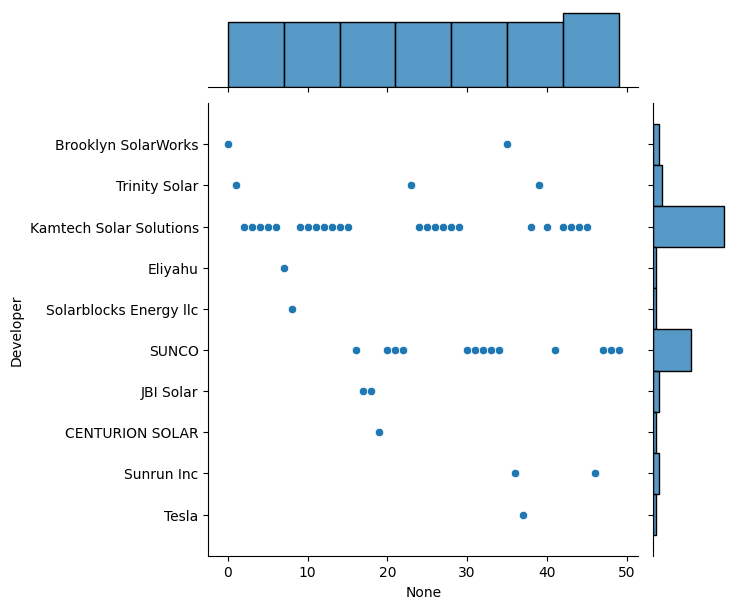

In [82]:
sns.jointplot(cleaned_data['Developer'])

<Axes: ylabel='City/Town'>

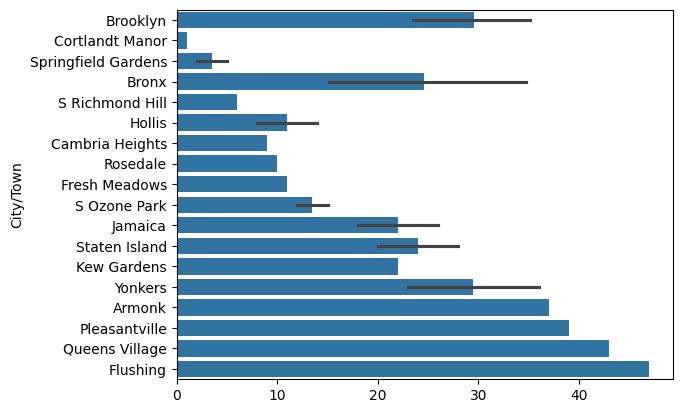

In [83]:
sns.barplot(cleaned_data['City/Town'])

<Axes: ylabel='Substation'>

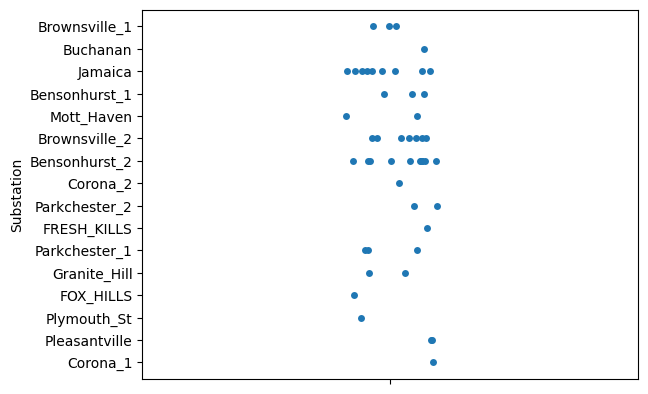

In [84]:
sns.stripplot(cleaned_data['Substation'])